## 分類1層 (mnist)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  x：入力値, d：教師データ, W：重み, b：バイアス をそれぞれ定義しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[False False  True ... False False False]
Generation: 1. 正解率 = 0.25
[ True False  True ... False False False]
Generation: 2. 正解率 = 0.3165
[ True False  True ... False False False]
Generation: 3. 正解率 = 0.3604
[ True False  True ... False False False]
Generation: 4. 正解率 = 0.4946
[ True False  True ... False False False]
Generation: 5. 正解率 = 0.5482
[ True False  True ... False False False]
Generation: 6. 正解率 = 0.6531
[ True False  True ... False False  True]
Generation: 7. 正解率 = 0.6332
[ True False  True ... False False False]
Generation: 8. 正解率 = 0.6181
[ True False  True ... False False  True]
Generation: 9. 正解率 = 0.6759
[ True  True  True ... False False  True]
Generation: 10. 正解率 = 0.714
[ True  True  True ... False False  True]
Generation: 11. 正解率 = 0.732
[ True  True  True ... False False  Tr

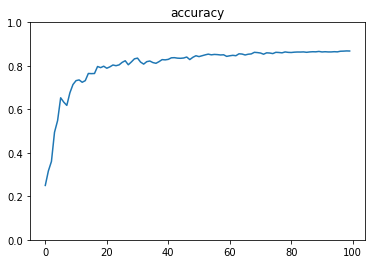

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

## 【レポート提出者変更】
%matplotlib inline

iters_num = 100
batch_size = 100
plot_interval = 1

# -------------- ここを補填 ------------------------
x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))
# ------------------------------------------------------

y = tf.nn.softmax(tf.matmul(x, W) + b)

# 交差エントロピー
cross_entropy = -tf.reduce_sum(d * tf.log(y), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 正誤を保存
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch})
    if (i+1) % plot_interval == 0:
        print(sess.run(correct, feed_dict={x: mnist.test.images, d: mnist.test.labels}))
        accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()        

In [4]:
d_batch[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
x_batch[0].shape

(784,)

In [6]:
x_batch[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

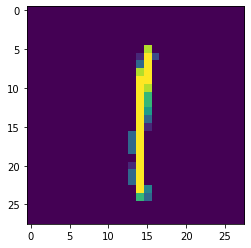

In [9]:
plt.imshow(x_batch[0].reshape(28,28))